In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spam_or_not_spam.csv to spam_or_not_spam.csv


In [ ]:
import pandas as pd         # Подключим библиотеку "панд"
#import numpy as np

In [ ]:
data = pd.read_csv('spam_or_not_spam.csv', encoding='iso-8859-1')   # Загрузим в data библиотеку "спам или не спам", 
                                                                    # котороя скачена и лежит в папке где и проект.
data.head()         # Посмотрим примерно, что она из себя представляет.

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [ ]:
data.shape             # Посмотрим размер.

(3000, 2)

In [ ]:
data.index.unique()     # Посмотрим правильность индексов.

RangeIndex(start=0, stop=3000, step=1)

In [ ]:
data.columns  # Посмотрим значения столбцов

Index(['email', 'label'], dtype='object')

In [ ]:
# Переименуем стобцы.
data = data[['email','label']].rename(columns={'email':'text', 'label' :'label "spam"'})
data.head()

,text,"label ""spam"""
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [ ]:
data.value_counts('label "spam"')       # Посмотрим распределение значений "Спама"

label "spam"
0    2500
1     500
dtype: int64

Стоп-слова для англиского языка в spaCy

In [ ]:
import spacy    # Импортируем библиотеку

In [ ]:
pd.set_option('max_colwidth', 400)

In [ ]:
#!python -m spacy download en_core_web_sm

In [ ]:
nlp_sm = spacy.load("en_core_web_sm")
stopwords_sm = nlp_sm.Defaults.stop_words
print(f'Spacy english stopwords size (web_sm): {len(stopwords_sm)}', end='\n\n')
' '.join(stopwords_sm)

Spacy english stopwords size (web_sm): 326



"is regarding as whose always eleven go once several yourself further therein one fifty quite although nevertheless became seem hundred amongst made this over where used forty others hereupon own nine he wherever ‘ve upon yourselves would myself seeming does due than thereupon cannot because had whoever same hereafter 're top toward himself two at both she back just done 've do latterly hereby put everywhere last while are throughout off there via about but his above really such no other ours only behind along into say with again whither becomes take that becoming ‘m else already our none up twenty side six if ten ’d another can some ever us seemed within my them least will him serious whole whereby have whether whom when third these so has get meanwhile nobody to alone before twelve must otherwise were am first therefore fifteen unless ’m noone how after a you everything bottom their sixty your four between under amount formerly see below 's 'm never thereafter somewhere each mostly t

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import spacy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
#!python3 -m spacy download en_core_web_md

Как мы видим, количество стоп-слов в en_core_web_sm и en_core_web_md одинаковое.

In [ ]:
#pd.set_option('max_colwidth', 400)

In [ ]:
data.head()

,text,"label ""spam"""
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMBER NUMBER from chris garrigues cwg dated NUMBER NUMBERfaNUMBERd deepeddy com message id NUMBER NUMBER tmda deepeddy vircio com i can t reproduce this error for me it is very repeatable like every time without fail this is the debug log of the pick happening NUMBER NUMBER NUMBER pick_it exec pick inbox list lbrace lbrace subject ftp rbrace rbrace NU...,0
1,martin a posted tassos papadopoulos the greek sculptor behind the plan judged that the limestone of mount kerdylio NUMBER miles east of salonika and not far from the mount athos monastic community was ideal for the patriotic sculpture as well as alexander s granite features NUMBER ft high and NUMBER ft wide a museum a restored amphitheatre and car park for admiring crowds are planned so is thi...,0
2,man threatens explosion in moscow thursday august NUMBER NUMBER NUMBER NUMBER pm moscow ap security officers on thursday seized an unidentified man who said he was armed with explosives and threatened to blow up his truck in front of russia s federal security services headquarters in moscow ntv television reported the officers seized an automatic rifle the man was carrying then the man got out...,0
3,klez the virus that won t die already the most prolific virus ever klez continues to wreak havoc andrew brandt from the september NUMBER issue of pc world magazine posted thursday august NUMBER NUMBER the klez worm is approaching its seventh month of wriggling across the web making it one of the most persistent viruses ever and experts warn that it may be a harbinger of new viruses that use a ...,0
4,in adding cream to spaghetti carbonara which has the same effect on pasta as making a pizza a deep pie i just had to jump in here as carbonara is one of my favourites to make and ask what the hell are you supposed to use instead of cream i ve never seen a recipe that hasn t used this personally i use low fat creme fraiche because it works quite nicely but the only time i ve seen an supposedly...,0


In [ ]:
data['text']= data['text'].astype(str)

Атрибуты Token

In [ ]:
%%time

data['cleaned_text_sm'] = data['text'].apply(
    lambda x: ' '.join(
        token.lemma_.lower() for token in nlp_sm(x) if  # Приведём к нижнему регистру и смотрим
        not token.is_stop                               # Стоп слова 
        and not token.is_punct                          # Пунктуация
        #and not token.is_digit                          # Цифра
        #and not token.like_email                        # Электронный почтовый адресс
        #and not token.like_num                          # Описание цифры
        and not token.is_space                          # Пробельные символы
    )
)
data.sample(15)

CPU times: user 1min 44s, sys: 826 ms, total: 1min 44s
Wall time: 1min 45s


,text,"label ""spam""",cleaned_text_sm
1268,hi in my build scripts i have problems with some of the kernel packages for kernel sources i get package kernel source is a virtual package provided by kernel source NUMBER NUMBER NUMBER NUMBER NUMBER NUMBER NUMBER NUMBER kernel source NUMBER NUMBER NUMBER NUMBER NUMBER NUMBER NUMBER NUMBER on running apt get install kernel source now first of all this doesn t really tell me what the two optio...,0,hi build script problem kernel package kernel source package kernel source virtual package provide kernel source number number number number number number number number kernel source number number number number number number number number run apt install kernel source doesn t tell option second way tell apt install automatic build script d like proceed thank thomas dave dina project future tv ...
2959,hi URL you get emails every day offering to show you how to make money most of these emails are from people who are not making any money and they expect you to listen to them enough if you want to make money with your computer then you should hook up with a group that is actually doing it we are making a large continuing income every month what s more we will show you how to do the same thing ...,1,hi url email day offer money email people make money expect listen want money computer hook group actually make large continue income month s thing business completely internet email join free check send email special skill require make number number month real people work business time mind work go insult intelligence say sign work rake cash kind job exist willing number number hour week thin...
885,don t know much about eroom but there is the magic phrase collaborate in real time groove really has people running scared wonder if any users actually benefit from collaborating in real time URL content management vendor documentum said late thursday it plans to acquire privately held e room technologies in a deal worth about NUMBER million documentum will issue approximately NUMBER NUMBER m...,0,don t know eroom magic phrase collaborate real time groove people run scared wonder user actually benefit collaborate real time url content management vendor documentum say late thursday plan acquire privately hold e room technology deal worth number million documentum issue approximately number number million share common stock pay number number million cash outstanding share eroom documentum...
2549,save up to NUMBER on your term life insurance compare rates from top insurance companies around the country in our life and times it s important to plan for your family s future while being comfortable financially choose the right life insurance policy today click the link below to compare the lowest rates and save up to NUMBER hyperlink compare your coverage you ll be able to compare rates a...,1,save number term life insurance compare rate insurance company country life time s important plan family s future comfortable financially choose right life insurance policy today click link compare low rate save number hyperlink compare coverage ll able compare rate free application minute free instant quote compare low price select company apply online hyperlink free quote t predict future pr...
2201,url URL date not supplied nyt op ed piece about this newfangled os called linux and how it is developed using something called the open source method this is the paper to go to for breaking news folks link NUMBER discuss NUMBER _ thanks dave _ NUMBER URL NUMBER URL,0,url url date supply nyt op ed piece newfangle os call linux develop call open source method paper break news folk link number discuss number thank dave number url number url
1029,i just updated to the latest cvs i had been running a build from june hitting the flist button gives the following traceback syntax error in expression int NUMBER NUMBER NUMBER NUMBER NUMBER NUMBER NUMBER while executing expr int minline NUMBER msgid minmsg maxline minline NUMBER max

CountVectorizer


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


#### Train/test split & fit

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Разделим на выборки
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text_sm'], data['label "spam"'], random_state=2303)

In [ ]:
vectorizer = CountVectorizer(max_df=0.7, min_df=0.003) # max_df фильтрует corpus-specific stop words
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
#Посмотрим, что получилось.
X_train_vectorized

<2250x3848 sparse matrix of type '<class 'numpy.int64'>'
	with 133406 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer.get_feature_names_out()

array(['aa', 'abandon', 'ability', ..., 'äº', 'ä½', 'å¾'], dtype=object)

In [ ]:
pd.DataFrame(X_train_vectorized.toarray(), columns=vectorizer.get_feature_names_out()).head()

,aa,abandon,ability,able,abroad,absence,absolute,absolutely,abstract,abuse,...,ziggy,zip,zone,zope,zzzz,ªå,ªæ,äº,ä½,å¾
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Бейзлайн

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

Константное предсказание

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent").fit(X_train_vectorized, y_train)
preds = dummy_clf.predict(X_test_vectorized)
print(classification_report(y_test, preds, zero_division=0))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       620
           1       0.00      0.00      0.00       130

    accuracy                           0.83       750
   macro avg       0.41      0.50      0.45       750
weighted avg       0.68      0.83      0.75       750



Логистическая регрессия

In [ ]:
logreg = LogisticRegression().fit(X_train_vectorized, y_train)
preds = logreg.predict(X_test_vectorized)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       620
           1       0.99      0.92      0.95       130

    accuracy                           0.98       750
   macro avg       0.99      0.96      0.97       750
weighted avg       0.98      0.98      0.98       750



Предопределим токенезатор.  
    Оставим только английские буквы

In [ ]:
import re

In [ ]:
def custom_tokenize(text):
  text = re.sub(r'[^a-zA-Z ]', '', text)
  return text.split()

In [ ]:
custom_vectorizer = CountVectorizer(
    max_df=0.7, 
    min_df=0.003, 
    tokenizer=custom_tokenize, # аналогично можно переопределить preprocessor
) 
X_train_custom_vectorized = custom_vectorizer.fit_transform(X_train)
X_test_custom_vectorized = custom_vectorizer.transform(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
X_train_custom_vectorized

<2250x3867 sparse matrix of type '<class 'numpy.int64'>'
	with 138326 stored elements in Compressed Sparse Row format>

In [ ]:
custom_vectorizer.get_feature_names_out()

array(['aa', 'abandon', 'ability', ..., 'zone', 'zope', 'zzzz'],
      dtype=object)

In [ ]:
pd.DataFrame(X_train_custom_vectorized.toarray(), columns=custom_vectorizer.get_feature_names_out()).head()

,aa,abandon,ability,able,abroad,absence,absolute,absolutely,abstract,abuse,...,yup,z,zealand,zealot,zero,ziggy,zip,zone,zope,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
logreg_custom = LogisticRegression().fit(X_train_custom_vectorized, y_train)
preds_custom = logreg_custom.predict(X_test_custom_vectorized)
print("Текущий результат")
print(classification_report(y_test, preds_custom))
print('--------------------------------------------------------')
print('Прошлый результат')
print(classification_report(y_test, preds))

Текущий результат
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       620
           1       0.98      0.92      0.95       130

    accuracy                           0.98       750
   macro avg       0.98      0.96      0.97       750
weighted avg       0.98      0.98      0.98       750

--------------------------------------------------------
Прошлый результат
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       620
           1       0.99      0.92      0.95       130

    accuracy                           0.98       750
   macro avg       0.99      0.96      0.97       750
weighted avg       0.98      0.98      0.98       750



#### TfidfTransformer vs  TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer,  TfidfVectorizer
from sklearn.pipeline import Pipeline

**TfidfTransformer** преобразует матрицу из CountVectorizer в tf-idf

In [ ]:
pipe = Pipeline(
    steps=[
        ('counter', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', LogisticRegression())
    ]
).fit(X_train, y_train)
preds1 = pipe.predict(X_test)

In [ ]:
pipe = Pipeline(
    steps=[
        ('counter', CountVectorizer(max_df=0.7, min_df=0.003)),
        ('tfidf', TfidfTransformer()),
        ('clf', LogisticRegression())
    ]
).fit(X_train, y_train)
preds2 = pipe.predict(X_test)

In [ ]:
pipe = Pipeline(
    steps=[
        ('counter', CountVectorizer(max_df=0.7, min_df=0.003, tokenizer=custom_tokenize)),
        ('tfidf', TfidfTransformer()),
        ('clf', LogisticRegression())
    ]
).fit(X_train, y_train)
preds3 = pipe.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
print("Вариант 1")
print(classification_report(y_test, preds1))
print("-------------------------------------------------")
print("Вариант 2")
print(classification_report(y_test, preds2))
print("-------------------------------------------------")
print("Вариант 3")
print(classification_report(y_test, preds3))

Вариант 1
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       620
           1       1.00      0.72      0.84       130

    accuracy                           0.95       750
   macro avg       0.97      0.86      0.91       750
weighted avg       0.95      0.95      0.95       750

-------------------------------------------------
Вариант 2
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       620
           1       1.00      0.78      0.88       130

    accuracy                           0.96       750
   macro avg       0.98      0.89      0.93       750
weighted avg       0.96      0.96      0.96       750

-------------------------------------------------
Вариант 3
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       620
           1       1.00      0.80      0.89       130

    accuracy                           0.97       75

In [ ]:
# А теперь попробуем TfidfVectorizer.
pipe = Pipeline(
    steps=[
        ('tfidf', TfidfVectorizer(max_df=0.7, min_df=0.003, tokenizer=custom_tokenize)),
        ('clf', LogisticRegression())
    ]
).fit(X_train, y_train)
preds4 = pipe.predict(X_test)


print("Вариант 3")
print(classification_report(y_test, preds3))
print("-------------------------------------------------")
print("Вариант 4")
print(classification_report(y_test, preds4))

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Вариант 3
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       620
           1       1.00      0.80      0.89       130

    accuracy                           0.97       750
   macro avg       0.98      0.90      0.93       750
weighted avg       0.97      0.97      0.96       750

-------------------------------------------------
Вариант 4
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       620
           1       1.00      0.80      0.89       130

    accuracy                           0.97       750
   macro avg       0.98      0.90      0.93       750
weighted avg       0.97      0.97      0.96       750



Оптимизируем гиперпараметры


### Обучим  TfidfVectorizer, LogisticRegression

In [ ]:
pipe = Pipeline(
    steps=[
        ('tfidf', TfidfVectorizer()),
        ('clf', LogisticRegression())
    ]
)

In [ ]:
import numpy as np

In [ ]:
parameter_grid = {
    "tfidf__max_df": np.linspace(0.3, 0.7, 20),
    "tfidf__min_df": [0.0, 0.001, 0.003, 0.005, 0.007],
    "tfidf__ngram_range": ((1, 1), (1, 2)),  # слова или биграммы
    "tfidf__norm": ("l1", "l2"),
    "clf__C": np.linspace(0.1, 1, 10),
}

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [ ]:
%%time

grid_search = HalvingGridSearchCV(
    pipe,
    param_grid=parameter_grid,
    n_jobs=-1,
    verbose=1,
    cv=2,
    scoring='accuracy',
)
grid_search.fit(X_train, y_train)

n_iterations: 6
n_required_iterations: 8
n_possible_iterations: 6
min_resources_: 8
max_resources_: 2250
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 4000
n_resources: 8
Fitting 2 folds for each of 4000 candidates, totalling 8000 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
4000 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1241, in fit
    raise ValueError(
ValueError: This solver needs samples of a

----------
iter: 1
n_candidates: 1334
n_resources: 24
Fitting 2 folds for each of 1334 candidates, totalling 2668 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.95833333 0.95833333 0.95833333]
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.79166667 0.79166667 0.79166667]
  warnings.warn(


----------
iter: 2
n_candidates: 445
n_resources: 72
Fitting 2 folds for each of 445 candidates, totalling 890 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.83333333 0.83333333 0.83333333]
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.86111111 0.86111111 0.86111111]
  warnings.warn(


----------
iter: 3
n_candidates: 149
n_resources: 216
Fitting 2 folds for each of 149 candidates, totalling 298 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.81018519 0.81018519 0.81018519]
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.84259259 0.84259259 0.84259259]
  warnings.warn(


----------
iter: 4
n_candidates: 50
n_resources: 648
Fitting 2 folds for each of 50 candidates, totalling 100 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.82716049 0.82716049 0.875     ]
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.81944444 0.81944444 0.91666667]
  warnings.warn(


----------
iter: 5
n_candidates: 17
n_resources: 1944
Fitting 2 folds for each of 17 candidates, totalling 34 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.90020576 0.9063786  0.94598765]
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.90740741 0.91358025 0.96399177]
  warnings.warn(


CPU times: user 14 s, sys: 963 ms, total: 15 s
Wall time: 2min 48s


HalvingGridSearchCV(cv=2,
                    estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                              ('clf', LogisticRegression())]),
                    n_jobs=-1,
                    param_grid={'clf__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                'tfidf__max_df': array([0.3       , 0.32105263, 0.34210526, 0.36315789, 0.38421053,
       0.40526316, 0.42631579, 0.44736842, 0.46842105, 0.48947368,
       0.51052632, 0.53157895, 0.55263158, 0.57368421, 0.59473684,
       0.61578947, 0.63684211, 0.65789474, 0.67894737, 0.7       ]),
                                'tfidf__min_df': [0.0, 0.001, 0.003, 0.005,
                                                  0.007],
                                'tfidf__ngram_range': ((1, 1), (1, 2)),
                                'tfidf__norm': ('l1', 'l2')},
                    scoring='accuracy', verbose=1)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams["figure.figsize"] = (12, 8)

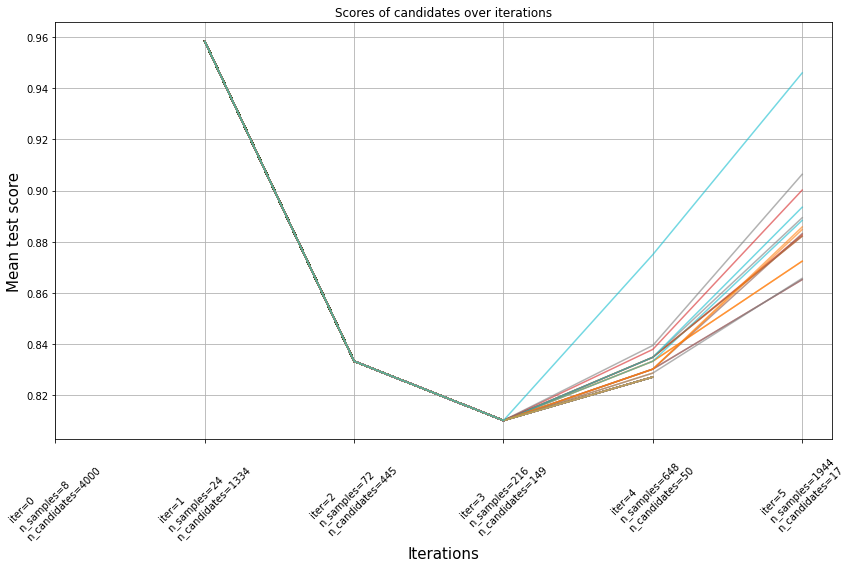

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
results["params_str"] = results.params.apply(str)
results.drop_duplicates(subset=("params_str", "iter"), inplace=True)
mean_scores = results.pivot(
    index="iter", 
    columns="params_str",
     values="mean_test_score",
)
ax = mean_scores.plot(legend=False, alpha=0.6)

labels = [
    f"iter={i}\nn_samples={grid_search.n_resources_[i]}\nn_candidates={grid_search.n_candidates_[i]}"
    for i in range(grid_search.n_iterations_)
]

ax.set_xticks(range(grid_search.n_iterations_))
ax.set_xticklabels(labels, rotation=45, multialignment="left")
ax.set_title("Scores of candidates over iterations")
ax.set_ylabel("Mean test score", fontsize=15)
ax.set_xlabel("Iterations", fontsize=15)
plt.tight_layout()
plt.grid()
plt.show()

In [ ]:
grid_search_tfidf_logist=grid_search
grid_search_tfidf_logist.best_score_

0.9459876543209877

In [ ]:
preds_tfidf_logist = grid_search_tfidf_logist.best_estimator_.predict(X_test)
print(classification_report(y_test, preds_tfidf_logist))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       620
           1       1.00      0.83      0.91       130

    accuracy                           0.97       750
   macro avg       0.98      0.92      0.95       750
weighted avg       0.97      0.97      0.97       750



In [ ]:
results.sort_values(by='mean_test_score', ascending=False).head(1)

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_tfidf__max_df,param_tfidf__min_df,param_tfidf__ngram_range,...,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score,params_str
4000,1,24,0.016797,0.002224,0.003489,0.0004,0.1,0.3,0.003,"(1, 2)",...,1.0,0.916667,0.958333,0.041667,1,0.666667,0.916667,0.791667,0.125,"{'clf__C': 0.1, 'tfidf__max_df': 0.3, 'tfidf__min_df': 0.003, 'tfidf__ngram_range': (1, 2), 'tfidf__norm': 'l1'}"


### Обучим на TfidfVectorizer, DecisionTreeClassifier.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
pipe = Pipeline(
    steps=[
        ('tfidf', TfidfVectorizer()),
        ('clf', DecisionTreeClassifier())
    ]
)

In [ ]:
parameter_grid = {
    "tfidf__max_df": np.linspace(0.3, 0.7, 10),
    "tfidf__min_df": [ 0.0, 0.001, 0.003, 0.005, 0.007],
    "tfidf__ngram_range": ((1, 1), (1, 2)),  # слова или биграммы
    "tfidf__norm": ("l1", "l2"),
    "clf__criterion": ("gini" , "entropy" , "log_loss"),
}

In [ ]:
%%time

grid_search = HalvingGridSearchCV(
    pipe,
    param_grid=parameter_grid,
    n_jobs=-1,
    verbose=1,
    cv=2,
    scoring='accuracy',
)
grid_search.fit(X_train, y_train)

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 9
max_resources_: 2250
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 600
n_resources: 9
Fitting 2 folds for each of 600 candidates, totalling 1200 fits
----------
iter: 1
n_candidates: 200
n_resources: 27
Fitting 2 folds for each of 200 candidates, totalling 400 fits
----------
iter: 2
n_candidates: 67
n_resources: 81
Fitting 2 folds for each of 67 candidates, totalling 134 fits
----------
iter: 3
n_candidates: 23
n_resources: 243
Fitting 2 folds for each of 23 candidates, totalling 46 fits
----------
iter: 4
n_candidates: 8
n_resources: 729
Fitting 2 folds for each of 8 candidates, totalling 16 fits
----------
iter: 5
n_candidates: 3
n_resources: 2187
Fitting 2 folds for each of 3 candidates, totalling 6 fits
CPU times: user 3.13 s, sys: 228 ms, total: 3.36 s
Wall time: 39.7 s


HalvingGridSearchCV(cv=2,
                    estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                              ('clf',
                                               DecisionTreeClassifier())]),
                    n_jobs=-1,
                    param_grid={'clf__criterion': ('gini', 'entropy',
                                                   'log_loss'),
                                'tfidf__max_df': array([0.3       , 0.34444444, 0.38888889, 0.43333333, 0.47777778,
       0.52222222, 0.56666667, 0.61111111, 0.65555556, 0.7       ]),
                                'tfidf__min_df': [0.0, 0.001, 0.003, 0.005,
                                                  0.007],
                                'tfidf__ngram_range': ((1, 1), (1, 2)),
                                'tfidf__norm': ('l1', 'l2')},
                    scoring='accuracy', verbose=1)

In [ ]:
grid_search_tfidf_tree = grid_search
grid_search_tfidf_tree.best_score_

0.9313815187557182

### Обучим на TfidfVectorizer, MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
pipe = Pipeline(
    steps=[
        ('tfidf', TfidfVectorizer()),
        ('clf', MultinomialNB())
    ]
)

In [ ]:
parameter_grid = {
    "tfidf__max_df": np.linspace(0.3, 0.7, 10),
    "tfidf__min_df": [ 0.005, 0.007],
    "tfidf__ngram_range": ((1, 1), (1, 2)),  # слова или биграммы
    "tfidf__norm": ("l1", "l2"),
}

In [ ]:
%%time

grid_search = HalvingGridSearchCV(
    pipe,
    param_grid=parameter_grid,
    n_jobs=-1,
    verbose=1,
    cv=2,
    scoring='accuracy',
)
grid_search.fit(X_train, y_train)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 83
max_resources_: 2250
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 80
n_resources: 83
Fitting 2 folds for each of 80 candidates, totalling 160 fits
----------
iter: 1
n_candidates: 27
n_resources: 249
Fitting 2 folds for each of 27 candidates, totalling 54 fits
----------
iter: 2
n_candidates: 9
n_resources: 747
Fitting 2 folds for each of 9 candidates, totalling 18 fits
----------
iter: 3
n_candidates: 3
n_resources: 2241
Fitting 2 folds for each of 3 candidates, totalling 6 fits
CPU times: user 1 s, sys: 93.8 ms, total: 1.1 s
Wall time: 13.5 s


HalvingGridSearchCV(cv=2,
                    estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                              ('clf', MultinomialNB())]),
                    n_jobs=-1,
                    param_grid={'tfidf__max_df': array([0.3       , 0.34444444, 0.38888889, 0.43333333, 0.47777778,
       0.52222222, 0.56666667, 0.61111111, 0.65555556, 0.7       ]),
                                'tfidf__min_df': [0.005, 0.007],
                                'tfidf__ngram_range': ((1, 1), (1, 2)),
                                'tfidf__norm': ('l1', 'l2')},
                    scoring='accuracy', verbose=1)

In [ ]:
grid_search_tfidf_naive_bayes = grid_search
grid_search_tfidf_naive_bayes.best_score_

0.9732142857142857

### Обучим CountVectorizer, DecisionTreeClassifier.

In [ ]:
pipe = Pipeline(
    steps=[
        ('count_vect', CountVectorizer()),
        ('clf', DecisionTreeClassifier())
    ]
)

In [ ]:
parameter_grid = {
    "count_vect__max_df": np.linspace(0.3, 0.7, 10),
    "count_vect__min_df": [ 0.0, 0.001, 0.003, 0.005, 0.007],
    "count_vect__ngram_range": ((1, 1), (1, 2)),  # слова или биграммы
    "clf__criterion": ("gini" , "entropy" , "log_loss"),
}

In [ ]:
%%time

grid_search = HalvingGridSearchCV(
    pipe,
    param_grid=parameter_grid,
    n_jobs=-1,
    verbose=1,
    cv=2,
    scoring='accuracy',
)
grid_search.fit(X_train, y_train)

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 9
max_resources_: 2250
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 300
n_resources: 9
Fitting 2 folds for each of 300 candidates, totalling 600 fits
----------
iter: 1
n_candidates: 100
n_resources: 27
Fitting 2 folds for each of 100 candidates, totalling 200 fits
----------
iter: 2
n_candidates: 34
n_resources: 81
Fitting 2 folds for each of 34 candidates, totalling 68 fits
----------
iter: 3
n_candidates: 12
n_resources: 243
Fitting 2 folds for each of 12 candidates, totalling 24 fits
----------
iter: 4
n_candidates: 4
n_resources: 729
Fitting 2 folds for each of 4 candidates, totalling 8 fits
----------
iter: 5
n_candidates: 2
n_resources: 2187
Fitting 2 folds for each of 2 candidates, totalling 4 fits
CPU times: user 1.67 s, sys: 98.1 ms, total: 1.76 s
Wall time: 14.4 s


HalvingGridSearchCV(cv=2,
                    estimator=Pipeline(steps=[('count_vect', CountVectorizer()),
                                              ('clf',
                                               DecisionTreeClassifier())]),
                    n_jobs=-1,
                    param_grid={'clf__criterion': ('gini', 'entropy',
                                                   'log_loss'),
                                'count_vect__max_df': array([0.3       , 0.34444444, 0.38888889, 0.43333333, 0.47777778,
       0.52222222, 0.56666667, 0.61111111, 0.65555556, 0.7       ]),
                                'count_vect__min_df': [0.0, 0.001, 0.003, 0.005,
                                                       0.007],
                                'count_vect__ngram_range': ((1, 1), (1, 2))},
                    scoring='accuracy', verbose=1)

In [ ]:
grid_search_count_vect_tree = grid_search
grid_search_count_vect_tree.best_score_

0.9423604757548033

### Обучим CountVectorizer, LogisticRegression.

In [ ]:
pipe = Pipeline(
    steps=[
        ('count_vect', CountVectorizer()),
        ('clf', LogisticRegression())
    ]
)

In [ ]:
parameter_grid = {
    "count_vect__max_df": np.linspace(0.3, 0.7, 10),
    "count_vect__min_df": [ 0.0, 0.001, 0.003, 0.005, 0.007],
    "count_vect__ngram_range": ((1, 1), (1, 2)),  # слова или биграммы
    "clf__C": np.linspace(0.1, 1, 10),
}

In [ ]:
%%time

grid_search = HalvingGridSearchCV(
    pipe,
    param_grid=parameter_grid,
    n_jobs=-1,
    verbose=1,
    cv=2,
    scoring='accuracy',
)
grid_search.fit(X_train, y_train)

n_iterations: 6
n_required_iterations: 7
n_possible_iterations: 6
min_resources_: 8
max_resources_: 2250
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1000
n_resources: 8
Fitting 2 folds for each of 1000 candidates, totalling 2000 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1000 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1241, in fit
    raise ValueError(
ValueError: This solver needs samples of a

----------
iter: 1
n_candidates: 334
n_resources: 24
Fitting 2 folds for each of 334 candidates, totalling 668 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
334 fits failed out of a total of 668.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
334 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1241, in fit
    raise ValueError(
ValueError: This solver needs samples of at l

----------
iter: 2
n_candidates: 112
n_resources: 72
Fitting 2 folds for each of 112 candidates, totalling 224 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.83333333 0.83333333 0.81944444]
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the train scores are non-finite: [nan nan nan ...  1.  1.  1.]
  warnings.warn(


----------
iter: 3
n_candidates: 38
n_resources: 216
Fitting 2 folds for each of 38 candidates, totalling 76 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.93518519 0.93518519 0.93518519]
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.99074074 0.99074074 0.99074074]
  warnings.warn(


----------
iter: 4
n_candidates: 13
n_resources: 648
Fitting 2 folds for each of 13 candidates, totalling 26 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.96141975 0.96141975 0.95679012]
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.99074074 0.99074074 0.99691358]
  warnings.warn(


----------
iter: 5
n_candidates: 5
n_resources: 1944
Fitting 2 folds for each of 5 candidates, totalling 10 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.97839506 0.97839506 0.97839506]
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.99537037 0.99537037 0.99537037]
  warnings.warn(


CPU times: user 3.84 s, sys: 256 ms, total: 4.1 s
Wall time: 38.7 s


HalvingGridSearchCV(cv=2,
                    estimator=Pipeline(steps=[('count_vect', CountVectorizer()),
                                              ('clf', LogisticRegression())]),
                    n_jobs=-1,
                    param_grid={'clf__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                'count_vect__max_df': array([0.3       , 0.34444444, 0.38888889, 0.43333333, 0.47777778,
       0.52222222, 0.56666667, 0.61111111, 0.65555556, 0.7       ]),
                                'count_vect__min_df': [0.0, 0.001, 0.003, 0.005,
                                                       0.007],
                                'count_vect__ngram_range': ((1, 1), (1, 2))},
                    scoring='accuracy', verbose=1)

In [ ]:
grid_search_count_vect_logist=grid_search
grid_search_count_vect_logist.best_score_

0.9783950617283951

### Обучение CountVectorizer, MultinomialNB

In [ ]:
pipe = Pipeline(
    steps=[
        ('count_vect', CountVectorizer()),
        ('clf', MultinomialNB())
    ]
)

In [ ]:
parameter_grid = {
    "count_vect__max_df": np.linspace(0.3, 0.7, 10),
    "count_vect__min_df": [ 0.003, 0.005, 0.007],
    "count_vect__ngram_range": ((1, 1), (1, 2)),  # слова или биграммы
}

In [ ]:
%%time

grid_search = HalvingGridSearchCV(
    pipe,
    param_grid=parameter_grid,
    n_jobs=-1,
    verbose=1,
    cv=2,
    scoring='accuracy',
)
grid_search.fit(X_train, y_train)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 83
max_resources_: 2250
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 60
n_resources: 83
Fitting 2 folds for each of 60 candidates, totalling 120 fits
----------
iter: 1
n_candidates: 20
n_resources: 249
Fitting 2 folds for each of 20 candidates, totalling 40 fits
----------
iter: 2
n_candidates: 7
n_resources: 747
Fitting 2 folds for each of 7 candidates, totalling 14 fits
----------
iter: 3
n_candidates: 3
n_resources: 2241
Fitting 2 folds for each of 3 candidates, totalling 6 fits
CPU times: user 621 ms, sys: 55.9 ms, total: 677 ms
Wall time: 8.94 s


HalvingGridSearchCV(cv=2,
                    estimator=Pipeline(steps=[('count_vect', CountVectorizer()),
                                              ('clf', MultinomialNB())]),
                    n_jobs=-1,
                    param_grid={'count_vect__max_df': array([0.3       , 0.34444444, 0.38888889, 0.43333333, 0.47777778,
       0.52222222, 0.56666667, 0.61111111, 0.65555556, 0.7       ]),
                                'count_vect__min_df': [0.003, 0.005, 0.007],
                                'count_vect__ngram_range': ((1, 1), (1, 2))},
                    scoring='accuracy', verbose=1)

In [ ]:
grid_search_count_vect_naive_bayes=grid_search
grid_search_count_vect_naive_bayes.best_score_

0.9794642857142857

In [ ]:
preds_tfidf_logist = grid_search_tfidf_logist.best_estimator_.predict(X_test)
print("preds_tfidf_logist ")
print()
print(classification_report(y_test, preds_tfidf_logist))

preds_tfidf_logist 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       620
           1       1.00      0.83      0.91       130

    accuracy                           0.97       750
   macro avg       0.98      0.92      0.95       750
weighted avg       0.97      0.97      0.97       750



In [ ]:
preds_tfidf_naive_bayes = grid_search_tfidf_naive_bayes.best_estimator_.predict(X_test)
print("tfidf_naive_bayes")
print()
print(classification_report(y_test, preds_tfidf_naive_bayes))

tfidf_naive_bayes

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       620
           1       0.98      0.92      0.95       130

    accuracy                           0.98       750
   macro avg       0.98      0.96      0.97       750
weighted avg       0.98      0.98      0.98       750



In [ ]:
preds_tfidf_tree = grid_search_tfidf_tree.best_estimator_.predict(X_test)
print("tfidf_tree")
print()
print(classification_report(y_test, preds_tfidf_tree))

tfidf_tree

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       620
           1       0.80      0.88      0.84       130

    accuracy                           0.94       750
   macro avg       0.89      0.92      0.90       750
weighted avg       0.94      0.94      0.94       750



In [ ]:
preds_count_vect_logist = grid_search_count_vect_logist.best_estimator_.predict(X_test)
print("count_vect_logist")
print()
print(classification_report(y_test, preds_count_vect_logist))

count_vect_logist

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       620
           1       0.99      0.92      0.95       130

    accuracy                           0.98       750
   macro avg       0.99      0.96      0.97       750
weighted avg       0.98      0.98      0.98       750



In [ ]:
preds_count_vect_naive_bayes = grid_search_count_vect_naive_bayes.best_estimator_.predict(X_test)
print("count_vect_naive_bayes")
print()
print(classification_report(y_test, preds_count_vect_naive_bayes))

count_vect_naive_bayes

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       620
           1       0.94      0.95      0.94       130

    accuracy                           0.98       750
   macro avg       0.96      0.97      0.97       750
weighted avg       0.98      0.98      0.98       750



In [ ]:
preds_count_vect_tree = grid_search_count_vect_tree.best_estimator_.predict(X_test)
print("count_vect_tree")
print()
print(classification_report(y_test, preds_count_vect_tree))

count_vect_tree

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       620
           1       0.81      0.88      0.85       130

    accuracy                           0.94       750
   macro avg       0.89      0.92      0.91       750
weighted avg       0.95      0.94      0.94       750

